In [1]:
# install packages
%pip install matplotlib
%pip install networkx
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import packages
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math

___

### General Timeline/Contents

Meeting Notes

Theory

Find all MISS

Find MISS with minimum weights (Atallah et al.)

Basic algorithm

Formulate associated graph of paths and cuts

___

### Meeting Notes

##### Jan 29
A set is *convex* if the segment connecting any two points that exist in the set is also entirely contained in the set. i.e. $S \text{ is convex if } \forall x, y \in S, \: \forall t \in [0, 1], \: tx + (1-t)y \in S$.
(affine if this is true for lines, not segments)

A set is *recessive* if any positive addition to the set is still contained in the set.

A *convex hull* of a set $S$ is the smallest convex set containing all points of the $S$, or the intersection of all convex sets containing $S$.

A point $x \in S$ is an *extreme point* of $S$ if for any linear combination of points that define $x$, those points are identically $x$. i.e. $x = \frac{1}{2} x_1 + \frac{1}{2} x_2 \text{ for } x_1, x_2 \in S \text{ and } t \in (0, 1) \implies x = x_1 = x_2$
For a square, these points are the vertices. For a half-disc, these points are the entire arc. Taking the convex combination (linear combination where all coefficients are nonnegative and sum to one) of these extreme points yields the convex hull of the set.

A *face* of a set $S$ denoted $S'$ is defined as a convex subset of $S$ where, if a relative interior point of a linear segment is in $S'$, the endpoints of that linear segment are also in $S'$. These can be n-dimensional. An *extreme direction* is a half-line face of the set.

A *convex cone* $C$ is defined as, if $x, y \in C \text{ and } a, b \text{ are positive scalars}, \: ax + by \in C $. Also, $C + C \subseteq C$

$C = \text{co}(\text{Ext}(C))$ if C is closed, convex, and bounded. If unbounded and in general **Theorem 14.2** applies. $C = \text{co}(\text{Ext}(C)) + \text{cone}(\text{Dir}(C))$

##### Feb 5

More on **Theorem 14.2**: $\text{Co(Ext(A))} \subset A $ <br>
Assume that $\exists a \in A \setminus \text{Co(Ext(A))}$. Then there exists a hyperplane that divides set $A$ from $a$. Define this hyperplane as $f(x) = c$. Consider $\max_{x \in A} f(x)$ then $\exists x_0 \in \text{ Ext(A) s.t. } x_0 \text{ is optimal and maximizes } f(x).$ OTOH, $f(b) < c < f(a) \: \forall b \in \text{Co(Ext(A))}$ $\Rightarrow \! \Leftarrow$ 

$\text{Dom(A)}$ is the closure of the convex hull with any positive vector (up and right)

$\text{Adm}(\Gamma)$ is the family of admissible objects an object is admissible if $\mathcal{N}(\gamma, \cdot)^T \rho \geq 1$. The admissible set is intersection of all the constraints ("intersection of closed half spaces"), along with $\rho \geq 0$

$\hat{\Gamma} := \text{Ext(Adm}(\Gamma))$ is the *Fulkerson Blocker (dual family)* of $\Gamma$

If $\mathcal{N} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$, the admissible set is the intersection of $y \geq 1$ and $x \geq 1$. The extreme point of this set is $(1,1)$. Thus, $\hat{\mathcal{N}} = \begin{bmatrix} 1 & 1 \end{bmatrix}$. Proving the "dual," $\text{Adm}(\hat{\Gamma})$ is the intersection of the positive quadrant with $x + y \geq 1$. The extreme points of this set are $(1,0)$ and $(0,1)$

The supp($\gamma$) are the columns that are '1' in the row vector corresponding to used edges. A family is proper if $\nexists \: \gamma_1, \gamma_2 \in \Gamma$ s.t. supp($\gamma_1$) $\subsetneq$ supp($\gamma_2$) 

##### Feb 12

To generate the associated graph of directed paths, we draw a directed edge from each node to each other node as long as $\text{val}[a] < \text{val}[b]$. We then delete edges with intermediate nodes. MISS would be all the paths from source to sink. Then we could find extreme points and directions as in the modulus book (using cdd)

Remember the output of find_MISS needs to be a usage matrix

Things to include: 
convex sets <br>
chapters in books <br>
fulkerson duality <br>
permutation <br>
young tableaux <br>
read paper, find MISS with minimum weights (paper) <br>
basic algorithm <br>
formulate associated graph (paths and cuts) like above (cdd)

##### Feb 19

Implement algorithm from last week, finding paths from sources to sinks. Find sources and sinks by looping through all neighbors of points and seeing if any are left and less or right and greater
<br> also finish recursive function

From paper (Atallah et al.): <br>
Algorithm for finding minumium independent dominating set in a permutation graph (equivalent to finding the shortest maximal increasing subsequence) <br>
*permutation graph*, *dominating set*, and *independent set* are defined in theory section below

Also discussed
$\epsilon \text{-nets}$ - given radius $\epsilon$, balls of radius $\epsilon$ need to cover the set. The net must be minimal i.e. every ball must be essential.

Also that an *independent dominating set* is *minimal dominating* since adding a node would make it not independent 

Also that maximal increasing subsequences in $\pi$ are an independent dominating set of $G(\pi)$

Suppose $A \in$ MIS, $A$ is subset of $V$, $A$ is an IDS

Assume A is not dominating. Then $\exists v \text{ s.t. } v \text{ in some } i_j < i_{j+1} \text{ s.t. } \pi(v) > \pi(i_j) \text{ and } \pi(v) < \pi(i_{j+1})$

Note: <br>
Maximal corresponds to dominating and increasing corresponds to independent, maximal independent is dominating

if $A$ is not independent, then $\exists a,b \in A \text{ where } a \sim b \text{ (adjacent) }, a < b \text{ s.t. } \pi(a) > \pi(b) \rightarrow A \text{ is not increasing }$

Since this is equivalent to maximal independent sets, we could also create a graph and use networkx to find maximal independent sets (These can be generated by picking a node, adding it to the set, then finding one with no neighbors with the current set of nodes, the repeating until no nodes can be added to the set).

Also add some comments

##### Feb 26

___

### Theory 

A permutation is an ordering of elements in a set.

Given a permutation, the *permutation graph* of that permutation is the undirected graph with vertexs for each element such that a vertex $i$ is adjacent to another vertex $j \text{ iff } i < j$ and $j$ comes before $i$ in the permutation

A *dominating set* is a subset of vertices in a graph such that any vertex in the original graph is in the subset or adjacent to a vertex in the subset

A set is *independent* if no two verices in the set are adjacent

Given a sequence $a = a_1 a_2 ... a_n$, a subsequence is a sequence of elements in a such that indicies $i_1 < i_2 < \dots < i_n$. This sequence is *increasing* if additionally, $a_{i_1} < a_{i_2} < \dots < a_{i_n}$.

A sequence is *maximal* if there it is not a part of a another, longer maximal increasing subsequence (MISS). A sequence is *maximum* if it is of maximum length of all the *maximal* increasing subsequences.

___
### Find all MISS - Examples

Consider the permutation of $1,\dots,5$:

$$
\pi = 2\ 1\ 4\ 5\ 3
$$

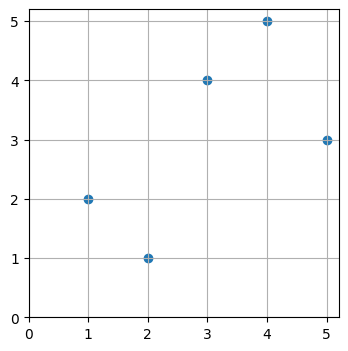

In [3]:
pi =  [2, 1, 4, 5, 3]

x = range(1,6)


# initialize figure
fig, fig = plt.subplots(figsize=(4, 4))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,6))
fig.set_yticks(range(0,6))
plt.grid(True)

Here's an example of a **MISS** (in fact this a longest increasing subsequence):
$$
1\ 4\ 5
$$
corresponding to the indicies $2<3<4$.

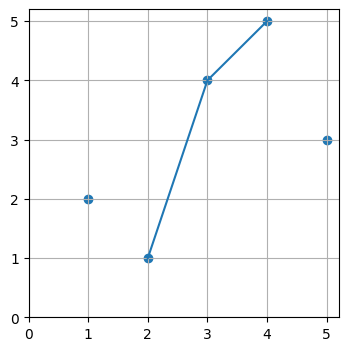

In [4]:
pi =  [2, 1, 4, 5, 3]
x = range(1,6)

ga = [1, 4, 5]
I = [2, 3, 4]

# initialize figure
fig, fig = plt.subplots(figsize=(4, 4))
    
plt.scatter(x,pi)
plt.plot(I,ga)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,6))
fig.set_yticks(range(0,6))
plt.grid(True)

Now to find all MISS. Note that the resulting graph will be a subgraph of the graph obtained by saying that two points $(i_1,\pi(i_1))$ and $(i_2,\pi(i_2))$ are connected iff $(i_2-i_1)(\pi(i_2)-\pi(i_1))>0$, because the latter will include also increasing subsequences that are not maximal.

connections:
[(1, 3), (1, 5), (2, 3), (2, 5), (3, 4)]
usage matrix:
[[1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1.]]
[[1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 0.]]


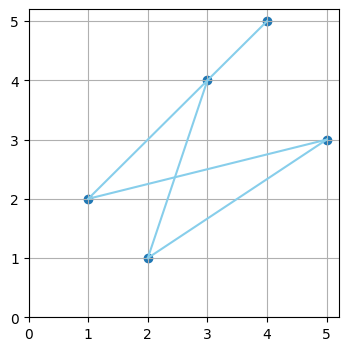

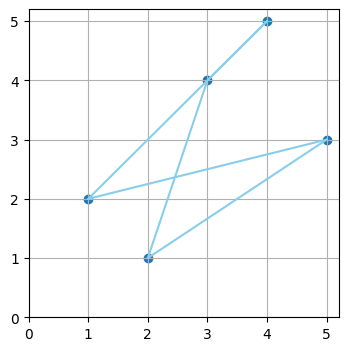

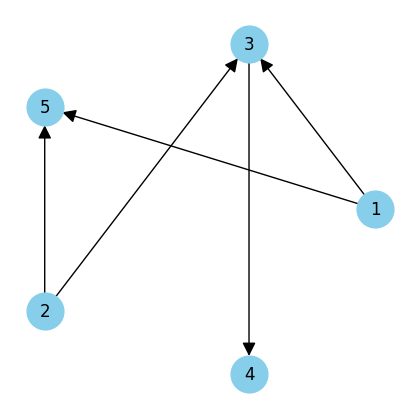

In [145]:
# def plot_all_MISS(s):
#     MISSi = []
#     seen = []
#     for i in range(len(s)):
#         if i not in seen:
#             temp = i
#             ISSi = [i]
#             for j in range(i, len(s)):
#                 if j not in seen:
#                     if s[j] > s[temp]:
#                         ISSi.append(j)
#                         temp = j
#                         seen.append(j)
#             MISSi.append(ISSi)

#     fig, ax = plt.subplots(figsize=(8, 8))
#     plt.scatter(range(1, 21), s)

#     MISS = [[s[i] for i in sublist] for sublist in MISSi]
#     MISSi = [[i + 1 for i in sublist] for sublist in MISSi]

#     for x, y in zip(MISSi, MISS):
#         plt.plot(x, y, color='blue')
#     ax.set_xticks(range(0,21))
#     ax.set_yticks(range(0,21))
#     plt.grid(True)

#     return MISS


def plot_all_connections(s):
    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    connections = list(set(connections))

    plt.figure(figsize=(4, 4))
    plt.scatter(range(1, 6), s)

    valid_connections = set()

    for connection in connections:
        if not in_box(connection, s):
            valid_connections.add((connection[0] + 1, connection[1] + 1))
            x1, x2 = connection[0], connection[1]
            plt.plot([x1 + 1, x2 + 1], [s[x1], s[x2]], color='skyblue')

    plt.xticks(range(0, 6))
    plt.yticks(range(0, 6))
    plt.grid(True)

    connections = sorted(list(valid_connections))

    return connections


# def plot_all_MISS(s):
#     MISSi = []
#     for i in range(len(s)):
#         temp = i
#         ISSi = [i]
#         for j in range(i, len(s)):
#             if s[j] > s[temp]:
#                 ISSi.append(j)
#                 temp = j
#         MISSi.append(ISSi)

#     fig, ax = plt.subplots(figsize=(8, 8))
#     plt.scatter(range(1, 21), s)

#     MISS = [[s[i] for i in sublist] for sublist in MISSi]
#     MISSi = [[i + 1 for i in sublist] for sublist in MISSi]

#     for x, y in zip(MISSi, MISS):
#         plt.plot(x, y, color='blue')
#     ax.set_xticks(range(0,21))
#     ax.set_yticks(range(0,21))
#     plt.grid(True)

#     return MISS

# def plot_all_MISS(s):
#     MISSi = []
#     for i in range(1, 2):
#         seen = set()
#         while any(x > i and s[x] > s[i] and x not in seen for x in range(i+1, len(s))):
#             ISSi = [i]
#             temp = i
#             for j in range(i, len(s)):
#                 if j not in seen:
#                     if s[j] > s[temp]:
#                         ISSi.append(j)
#                         temp = j
#                         seen.add(j)
#             MISSi.append(ISSi)

#     fig, ax = plt.subplots(figsize=(8, 8))
#     plt.scatter(range(1, 21), s)

#     MISS = [[s[i] for i in sublist] for sublist in MISSi]
#     MISSi = [[i + 1 for i in sublist] for sublist in MISSi]

#     for x, y in zip(MISSi, MISS):
#         plt.plot(x, y, color='blue')
#     ax.set_xticks(range(0,21))
#     ax.set_yticks(range(0,21))
#     plt.grid(True)

#     return MISS

# # maybe recursively
# def plot_all_MISS(s):
#     ISSi = []
#     for i in range(1, 2):
#         for j in range(i, len(s)):

#     fig, ax = plt.subplots(figsize=(8, 8))
#     plt.scatter(range(1, 21), s)

#     MISS = [[s[i] for i in sublist] for sublist in MISSi]
#     MISSi = [[i + 1 for i in sublist] for sublist in MISSi]

#     for x, y in zip(MISSi, MISS):
#         plt.plot(x, y, color='blue')
#     ax.set_xticks(range(0,21))
#     ax.set_yticks(range(0,21))
#     plt.grid(True)

#     return MISS


def in_box(t, s):
    i, j = t[0], t[1]
    if any(s[x] < s[j] and s[x] > s[i] for x in range(i + 1, j)):
        return True
    return False

def find_sources(s):
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def plot_all_MISS(s):
    m = np.empty((0, 5))
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            # print(f"i {i}")
            # print(s[i], s[x])
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
            # print(greater)
        # greater = [i for i in range(x, len(s)) if s[i] > s[x] and not any(s[j] < s[i] for j in range(x + 1, i))]
        # print("greater:")
        # print(greater)
        # print("s[greater]:")
        # print([s[i] for i in greater])
        if len(greater) == 0:
            nonlocal m
            m = np.concatenate((m, [row]), axis=0)
            # print(f"m:\n {m}")
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        # print(source)
        recurse(s, source, np.zeros(5)) 

    plt.figure(figsize=(4, 4))

    plt.scatter(range(1, 6), s)
    
    for row in m:
        indices = np.nonzero(row)
        plt.plot(indices[0] + 1, [s[i] for i in indices[0]], color='skyblue')

    plt.xticks(range(0, 6))
    plt.yticks(range(0, 6))
    plt.grid(True)

    return m

def MISS_from_connections(c):
    plt.figure(figsize=(4, 4))
    g = nx.DiGraph()
    g.add_edges_from(c)
    
    m = np.empty((0, 5))
        
    sink_nodes = [node for node, out_degree in g.out_degree() if out_degree == 0]
    source_nodes = [node for node, in_degree in g.in_degree() if in_degree == 0]
    for (source, sink) in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        for path in nx.all_simple_paths(g, source=source, target=sink):
            row = np.zeros(5)
            for i in path:
                row[i - 1] = 1
            m = np.concatenate((m, [row]), axis=0)

    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels=True, arrowsize=20, node_size=700, node_color='skyblue')

    return m

pi = [2, 1, 4, 5, 3]

print("connections:")
connections = plot_all_connections(pi)
print(connections)
print("usage matrix from recursive function:")
print(plot_all_MISS(pi))
print("usage matrix from connections and networkx:")
print(MISS_from_connections(connections))

Now consider the permutation of $1,\dots,20$:

$$
\pi = 7\ 3\ 1\ 17\ 10\ 18\ 9\ 20\ 6\ 12\ 16\ 13\ 2\ 8\ 19\ 4\ 15\ 11\ 14\ 5
$$

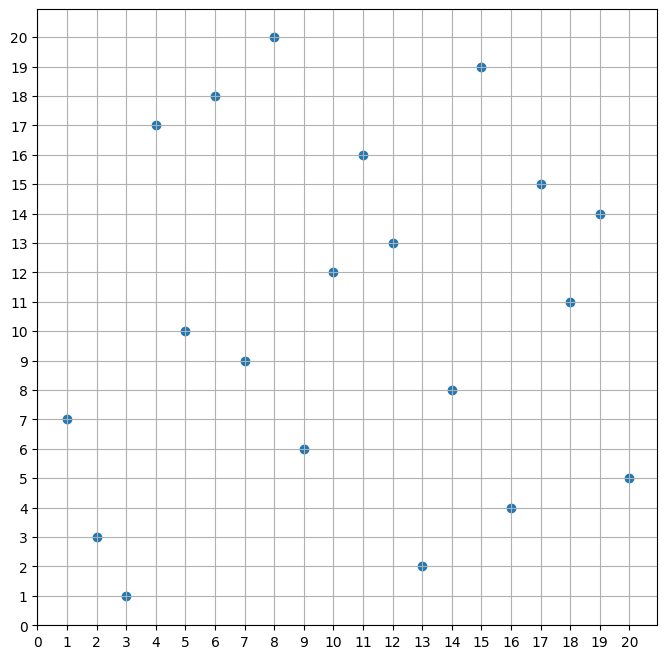

In [6]:
pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

x = range(1,21)


# initialize figure
fig, fig = plt.subplots(figsize=(8, 8))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,21))
fig.set_yticks(range(0,21))
plt.grid(True)

Here's an example of a **MISS** (in fact this a longest increasing subsequence):
$$
1\ 6\ 8\ 11\ 14
$$
corresponding to the indicies $3<9<14<18<19$.

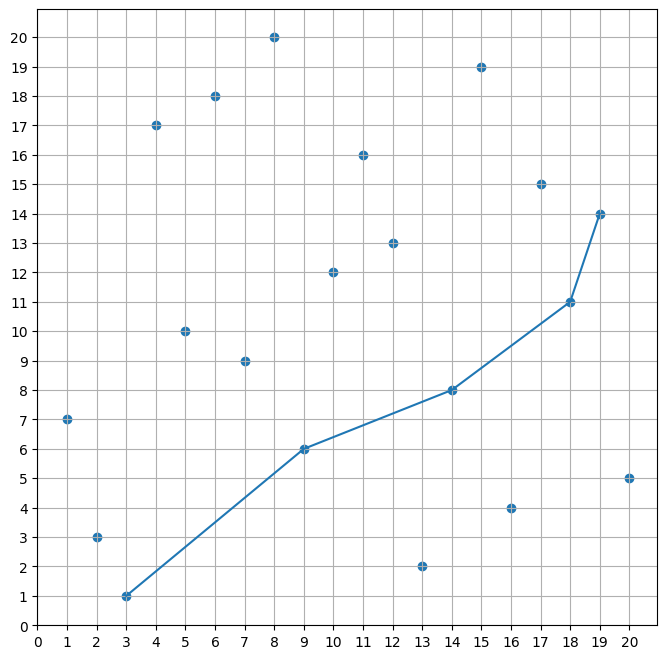

In [7]:
pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]
x = range(1,21)

ga = [1,6,8,11,14]
I = [3,9,14,18,19]

# initialize figure
fig, fig = plt.subplots(figsize=(8, 8))
    
plt.scatter(x,pi)
plt.plot(I,ga)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,21))
fig.set_yticks(range(0,21))
plt.grid(True)

Now to find all MISS.

connections:
[(1, 4), (1, 5), (1, 7), (1, 14), (2, 4), (2, 5), (2, 7), (2, 9), (2, 16), (3, 4), (3, 5), (3, 7), (3, 9), (3, 13), (4, 6), (5, 6), (5, 10), (5, 18), (6, 8), (6, 15), (7, 8), (7, 10), (7, 18), (9, 10), (9, 14), (10, 11), (10, 12), (11, 15), (12, 15), (12, 17), (12, 19), (13, 14), (13, 16), (14, 15), (14, 17), (14, 18), (16, 17), (16, 18), (16, 20), (18, 19)]
usage matrix from recursive function:
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]
1420
usage matrix from connections and networkx:
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]
1420


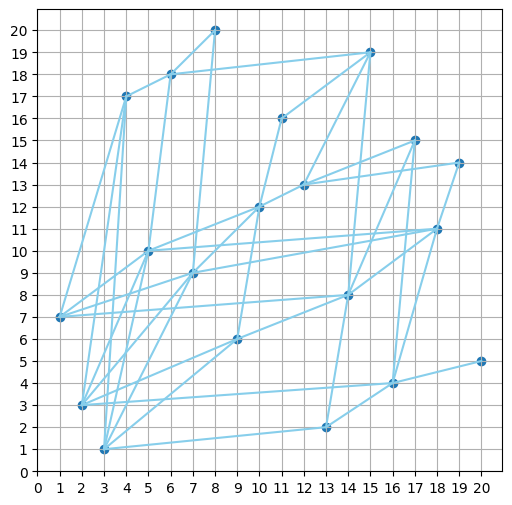

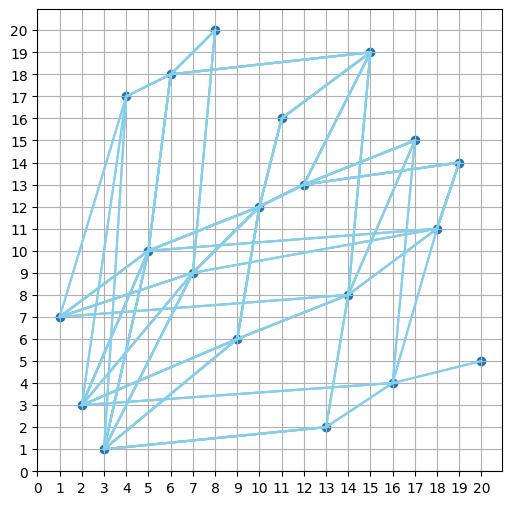

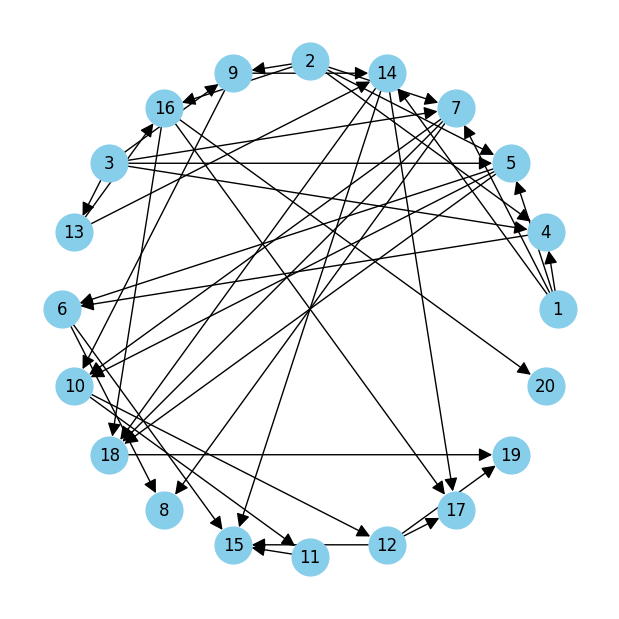

In [149]:

def plot_all_connections(s):
    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    connections = list(set(connections))

    plt.figure(figsize=(6, 6))
    plt.scatter(range(1, 21), s)

    valid_connections = set()

    for connection in connections:
        if not in_box(connection, s):
            valid_connections.add((connection[0] + 1, connection[1] + 1))
            x1, x2 = connection[0], connection[1]
            plt.plot([x1 + 1, x2 + 1], [s[x1], s[x2]], color='skyblue')

    plt.xticks(range(0, 21))
    plt.yticks(range(0, 21))
    plt.grid(True)

    MISS = sorted(list(valid_connections))

    return MISS

def in_box(t, s):
    i, j = t[0], t[1]
    if any(s[x] < s[j] and s[x] > s[i] for x in range(i + 1, j)):
        return True
    return False

def find_sources(s):
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def plot_all_MISS(s):
    m = np.empty((0, 20))
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            # print(f"i {i}")
            # print(s[i], s[x])
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
            # print(greater)
        # greater = [i for i in range(x, len(s)) if s[i] > s[x] and not any(s[j] < s[i] for j in range(x + 1, i))]
        # print("greater:")
        # print(greater)
        # print("s[greater]:")
        # print([s[i] for i in greater])
        if len(greater) == 0:
            nonlocal m
            m = np.concatenate((m, [row]), axis=0)
            # print(f"m:\n {m}")
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        # print(source)
        recurse(s, source, np.zeros(20)) 

    plt.figure(figsize=(6, 6))

    plt.scatter(range(1, 21), s)
    
    for row in m:
        indices = np.nonzero(row)
        plt.plot(indices[0] + 1, [s[i] for i in indices[0]], color='skyblue')

    plt.xticks(range(0, 21))
    plt.yticks(range(0, 21))
    plt.grid(True)

    return m

def MISS_from_connections(c):
    plt.figure(figsize=(6, 6))
    g = nx.DiGraph()
    g.add_edges_from(c)
    
    m = np.empty((0, 20))
        
    sink_nodes = [node for node, out_degree in g.out_degree() if out_degree == 0]
    source_nodes = [node for node, in_degree in g.in_degree() if in_degree == 0]
    for (source, sink) in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        for path in nx.all_simple_paths(g, source=source, target=sink):
            row = np.zeros(20)
            for i in path:
                row[i - 1] = 1
            m = np.concatenate((m, [row]), axis=0)

    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels=True, arrowsize=20, node_size=700, node_color='skyblue')

    return m

pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

print("connections:")
connections = plot_all_connections(pi)
print(connections)
print("usage matrix from recursive function:")
# print(np.array2string(plot_all_MISS(pi), threshold=np.inf))
recursive_miss = plot_all_MISS(pi)
print(recursive_miss)
print(recursive_miss.size)
print("usage matrix from connections and networkx:")
# print(np.array2string(MISS_from_connections(connections), threshold=np.inf))
connections_miss = MISS_from_connections(connections)
print(connections_miss)
print(connections_miss.size)

